In [8]:
from sklearn.datasets import make_blobs
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [9]:
def gen_inlier(n_samples, center=[2.5, 9.0, 0.0], std=0.18, seed=42):
    if seed=="rand":
        seed=None
    X_in, _ = make_blobs(
        n_samples=n_samples,
        n_features=3,
        centers=[center],
        cluster_std=std,
        random_state=seed
    )
    return np.hstack([X_in, np.full((n_samples, 1), fill_value=0)])

def gen_outlier_ring(n_samples, inner_radius, outer_radius, center=[2.5, 9.0, 0.0], seed=42):
    if seed == "rand":
        seed = None
    rng = np.random.default_rng(seed)
    
    center = np.array(center)
    # Random directions (on unit sphere)
    directions = rng.normal(size=(n_samples, 3))
    directions /= np.linalg.norm(directions, axis=1)[:, None]
    
    # Random radii between inner and outer radius
    radii = rng.uniform(inner_radius, outer_radius, size=n_samples)
    
    # Points = center + radius * direction
    X_out = center + directions * radii[:, None]
    
    return np.hstack([X_out, np.full((n_samples, 1), fill_value=1)])

In [10]:
inlier_init = gen_inlier(n_samples=800, seed=42)
outlier_init = gen_outlier_ring(n_samples=200, seed=42, inner_radius=0.3, outer_radius=0.5)

init_data = pd.DataFrame(np.vstack((inlier_init, outlier_init)), columns=["temp", "humidity", "sound_volume", "label"])
init_data = init_data.sample(frac=1).reset_index(drop=True)

init_data["id"] = init_data.index

init_data.to_csv("init_data.csv")

In [11]:
def plot_gen_data(data):

    fig = plt.figure(figsize=(5, 5), layout="constrained")
    ax = fig.add_subplot(projection='3d')

    ax.scatter(data["temp"], data["humidity"], data["sound_volume"], c=data["label"], cmap="viridis")
    ax.set_xlabel("Temperature")
    ax.set_ylabel("Humidity")
    ax.set_zlabel("Sound Volume")

    plt.tight_layout()
    plt.show()

C:\Users\Edi\AppData\Local\Temp\ipykernel_11608\3506441267.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


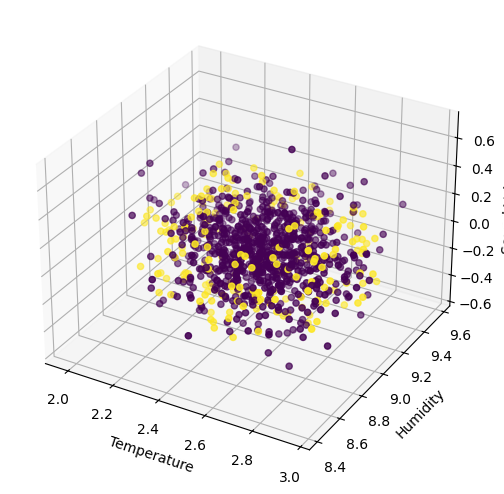

In [12]:
plot_gen_data(init_data)

In [13]:
inlier_new = gen_inlier(n_samples=1700, seed=42)
outlier_new = gen_outlier_ring(n_samples=300, seed=42, inner_radius=0.5, outer_radius=1.0)

new_data = pd.DataFrame(np.vstack((inlier_new, outlier_new)), columns=["temp", "humidity", "sound_volume", "label"])
new_data = new_data.sample(frac=1).reset_index(drop=True)

new_data["id"] = new_data.index

new_data.to_csv("new_data.csv")

C:\Users\Edi\AppData\Local\Temp\ipykernel_11608\3506441267.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


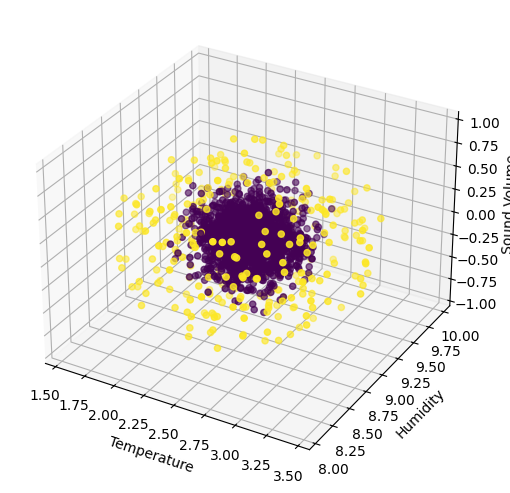

In [14]:
plot_gen_data(new_data)